## Question 1 - Refreshing Mathematics

### Part A:

Computing the gradient of $ f $ with respect to $ w $:

$$ w = [w_1, ..., w_n]^T $$

$$
\nabla f(w) = \begin{bmatrix}
           \frac{\partial f}{\partial w_1} \\
           \vdots \\
           \frac{\partial f}{\partial w_n}
         \end{bmatrix}
$$

$$
f(w) = w^TXb = \sum_{i = 1}^{n}w_iX_{i1}b_1 + \sum_{i = 1}^{n}w_iX_{i2}b_2 + \dots + \sum_{i = 1}^{n}w_iX_{ip}b_p
$$

$$
\frac{\partial f}{\partial w_i} = X_{i1}b1 + X_{i2}b_2 + \dots + X_{ip}b_p
$$

$$
\nabla f(w) = \begin{bmatrix}
           \sum_{i = 1}^{p} X_{1i}b_i \\
           \sum_{i = 1}^{p} X_{2i}b_i \\
           \vdots \\
           \sum_{i = 1}^{p} X_{ni}b_i
         \end{bmatrix}
$$

### Part B:

Computing the gradient of $ f $ with respect to $ w $:

$$ w = [w_1, ..., w_n]^T $$

$$
\nabla f(w) = \begin{bmatrix}
           \frac{\partial f}{\partial w_1} \\
           \vdots \\
           \frac{\partial f}{\partial w_n}
         \end{bmatrix}
$$

Using cyclic trace property and by the properties of trace (summing diagonal):
$$
f(w)=tr(Bww^TA) = tr(ww^TBA) = \sum_{i=1}^n (ww^TBA)_{ii}
$$

$$
\frac{\partial f}{\partial w_i} = \frac{\partial}{\partial w_i} \sum_{j=1}^n (w_jw^TBA)_{jj}
$$

$$
\frac{\partial f}{\partial w_i} = \sum_{i=1}^n 2B_{ij}w_j^TA
$$

$$
\nabla f(w) = \begin{bmatrix}
           \sum_{j=1}^n 2B_{1j}w_j^TA \\
           \sum_{j=1}^n 2B_{2j}w_j^TA \\
           \vdots \\
           \sum_{j=1}^n 2B_{nj}w_j^TA
         \end{bmatrix}
$$

### Part C:

### Part D:

### Part #:

## Question 2 - Linear and Polynomial Regression

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part A:

In [2]:
# Loading Data
trainingX = pd.read_csv('hw1xtr.dat', header=None)
trainingY = pd.read_csv('hw1ytr.dat', header=None)
testX = pd.read_csv('hw1xte.dat', header=None)
testY = pd.read_csv('hw1yte.dat', header=None)

Text(0, 0.5, 'Y')

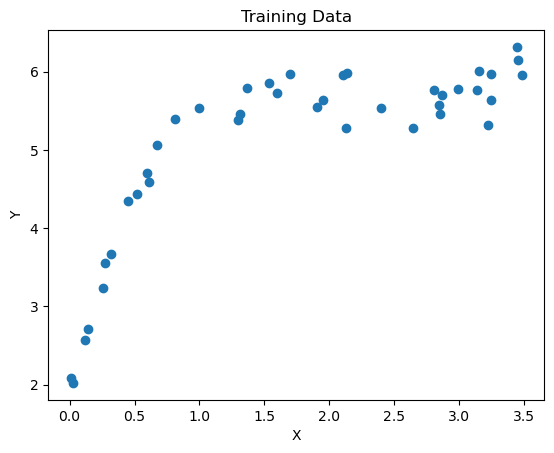

In [3]:
# Plotting Training Data
plt.scatter(trainingX, trainingY)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

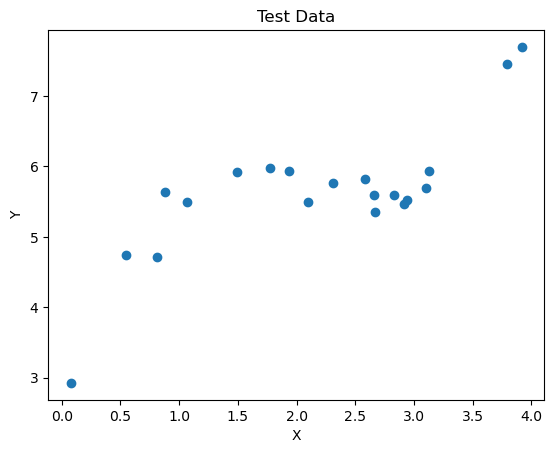

In [4]:
# Plotting Test Data
plt.scatter(testX, testY)
plt.title('Test Data')
plt.xlabel('X')
plt.ylabel('Y')

#### Part B:

Average Error on Training Data:  0    0.508589
dtype: float64


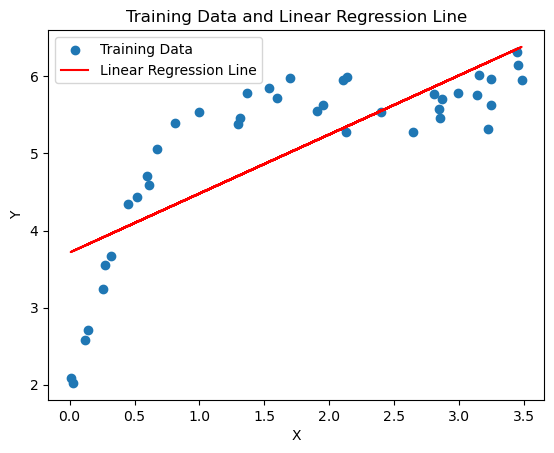

In [14]:
# Add Column Vector of 1's to Features
trainingXLR = pd.concat([pd.Series(1, index=trainingX.index, name='00'), trainingX], axis=1)

# Manual Linear Regression -> h_w(x) = w^Tx + b
# w = (X^T * X)^-1 * X^T * Y
def regression(X, Y):
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return w

w = regression(trainingXLR, trainingY)

# Plot linear regression line and training data together
plt.scatter(trainingX, trainingY)
plt.plot(trainingX, w[1]*trainingX + w[0], color='red')
plt.legend(['Training Data', 'Linear Regression Line'])
plt.title('Training Data and Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on training data (err = 1/m * sum(w^Tx_i - y_i)^2)
def averageError(X, Y, w):
    m = len(X)
    err = 1/m * np.sum((np.dot(X, w) - Y)**2)
    return err

err = averageError(trainingXLR, trainingY, w)
print("Average Error on Training Data: ", err)


### Part C:

Average Error on Test Data:  0    0.443912
dtype: float64


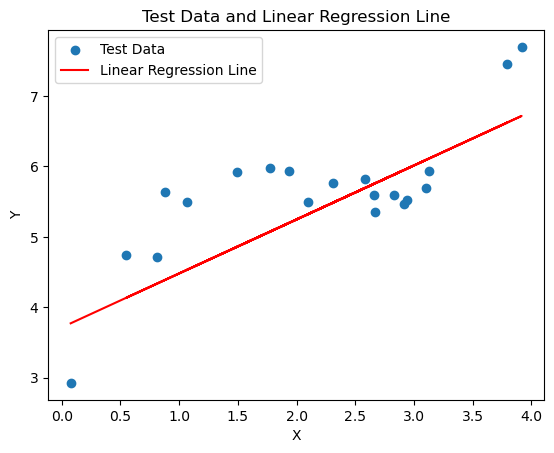

In [15]:
# Plot linear regression line and test data together
plt.scatter(testX, testY)
plt.plot(testX, w[1]*testX + w[0], color='red')
plt.legend(['Test Data', 'Linear Regression Line'])
plt.title('Test Data and Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on test data
testXLR = pd.concat([pd.Series(1, index=testX.index, name='00'), testX], axis=1)
err = averageError(testXLR, testY, w)
print("Average Error on Test Data: ", err)

#### Part D:

Average Error on Training Data (2nd-Order Polynomial Regression):  0    0.200985
dtype: float64


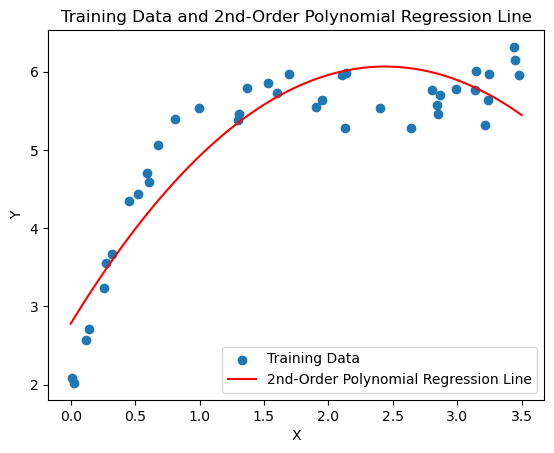

In [29]:
# Add new feature x^2 to the training and test data
trainingX2 = trainingX**2
testX2 = testX**2

trainingXLR2 = pd.concat([trainingXLR, trainingX2], axis=1)
testXLR2 = pd.concat([testXLR, testX2], axis=1)

# Perform 2nd-order polynomial regression on new data
w2 = regression(trainingXLR2, trainingY)

# Plot training data
plt.scatter(trainingX, trainingY)

# Plot the 2nd-order polynomial regression line
x = np.linspace(0, 3.5, 100)
y = w2[2]*x**2 + w2[1]*x + w2[0]
plt.plot(x, y, color='red')
plt.legend(['Training Data', '2nd-Order Polynomial Regression Line'])
plt.title('Training Data and 2nd-Order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on training data
err = averageError(trainingXLR2, trainingY, w2)
print("Average Error on Training Data (2nd-Order Polynomial Regression): ", err)

Average Error on Test Data (2nd-Order Polynomial Regression):  0    0.853263
dtype: float64


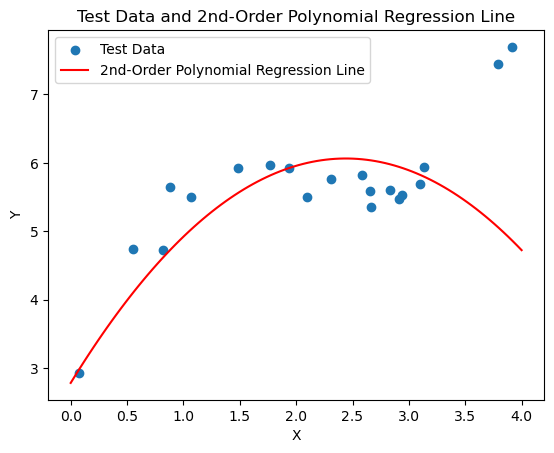

In [31]:
# Plot 2nd-order polynomial regression line and test data together
plt.scatter(testX, testY)

# Plot the 2nd-order polynomial regression line
x = np.linspace(0, 4, 100)
y = w2[2]*x**2 + w2[1]*x + w2[0]
plt.plot(x, y, color='red')
plt.legend(['Test Data', '2nd-Order Polynomial Regression Line'])
plt.title('Test Data and 2nd-Order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on training data
err = averageError(testXLR2, testY, w2)
print("Average Error on Test Data (2nd-Order Polynomial Regression): ", err)

##### What's Better? Linear vs. 2nd-order
It is better to fit the linear regression line over the 2nd-order regression line in this case. While the training error is significantly better on the 2nd-order example, the test data is much worse with 0.85 average error compared to 0.44 average error in the linear case.

### Part E:

Average Error on Training Data (3rd-Order Polynomial Regression):  0    0.039229
dtype: float64


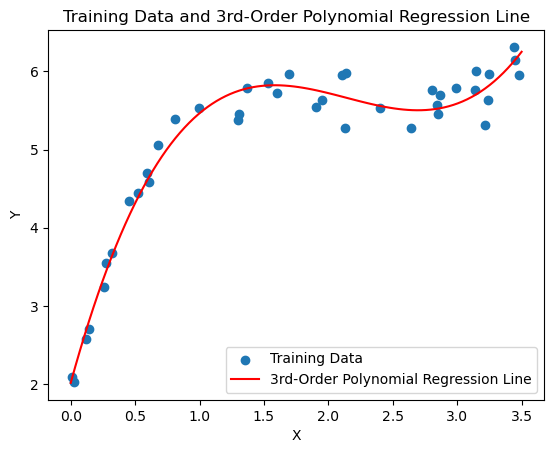

In [32]:
# Add new feature x^3 to the training and test data
trainingX3 = trainingX**3
testX3 = testX**3

trainingXLR3 = pd.concat([trainingXLR2, trainingX3], axis=1)
testXLR3 = pd.concat([testXLR2, testX3], axis=1)

# Perform 3rd-order polynomial regression on new data
w3 = regression(trainingXLR3, trainingY)

# Plot 3rd-order polynomial regression line and training data together
plt.scatter(trainingX, trainingY)

# Plot the 3rd-order polynomial regression line
x = np.linspace(0, 3.5, 100)
y = w3[3]*x**3 + w3[2]*x**2 + w3[1]*x + w3[0]
plt.plot(x, y, color='red')
plt.legend(['Training Data', '3rd-Order Polynomial Regression Line'])
plt.title('Training Data and 3rd-Order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on training data
err = averageError(trainingXLR3, trainingY, w3)
print("Average Error on Training Data (3rd-Order Polynomial Regression): ", err)

Average Error on Test Data (3rd-Order Polynomial Regression):  0    0.056418
dtype: float64


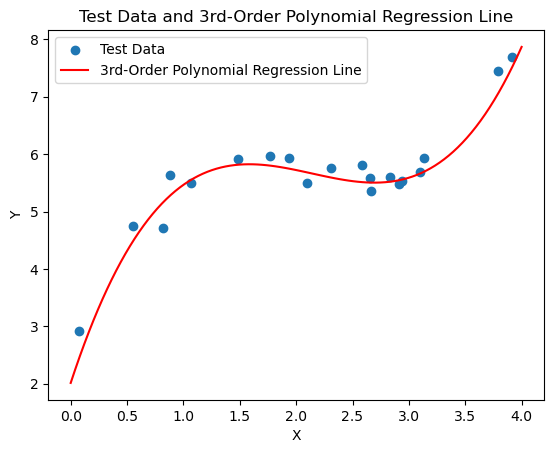

In [33]:
# Plot 3rd-order polynomial regression line and test data together
plt.scatter(testX, testY)

# Plot the 3rd-order polynomial regression line
x = np.linspace(0, 4, 100)
y = w3[3]*x**3 + w3[2]*x**2 + w3[1]*x + w3[0]
plt.plot(x, y, color='red')
plt.legend(['Test Data', '3rd-Order Polynomial Regression Line'])
plt.title('Test Data and 3rd-Order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on test data
err = averageError(testXLR3, testY, w3)
print("Average Error on Test Data (3rd-Order Polynomial Regression): ", err)

##### What's Better? Linear vs. 3rd-order Polynomial Regression
The 3rd-order polynomial regression is a better fit than the linear regression.

For the training data, the average error is 0.039 compared to 0.508 for linear regression.

For the test data, the average error is 0.056 compared to 0.444 for linear regression.

### Part F:

Average Error on Training Data (4th-Order Polynomial Regression):  0    0.035645
dtype: float64


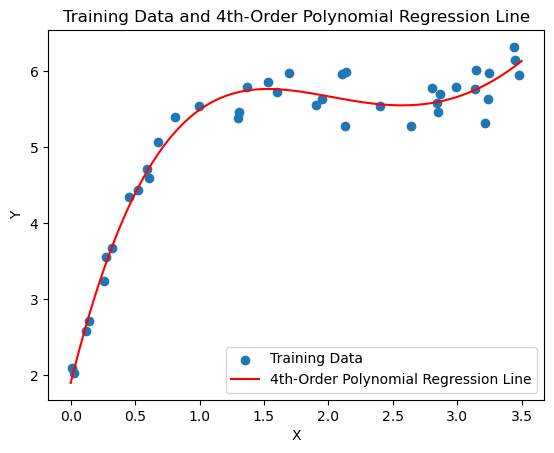

In [34]:
# Add new feature x^4 to the training and test data
trainingX4 = trainingX**4
testX4 = testX**4

trainingXLR4 = pd.concat([trainingXLR3, trainingX4], axis=1)
testXLR4 = pd.concat([testXLR3, testX4], axis=1)

# Perform 4th-order polynomial regression on new data
w4 = regression(trainingXLR4, trainingY)

# Plot 4th-order polynomial regression line and training data together
plt.scatter(trainingX, trainingY)

# Plot the 4th-order polynomial regression line
x = np.linspace(0, 3.5, 100)
y = w4[4]*x**4 + w4[3]*x**3 + w4[2]*x**2 + w4[1]*x + w4[0]
plt.plot(x, y, color='red')
plt.legend(['Training Data', '4th-Order Polynomial Regression Line'])
plt.title('Training Data and 4th-Order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on training data
err = averageError(trainingXLR4, trainingY, w4)
print("Average Error on Training Data (4th-Order Polynomial Regression): ", err)

Average Error on Test Data (4th-Order Polynomial Regression):  0    0.127222
dtype: float64


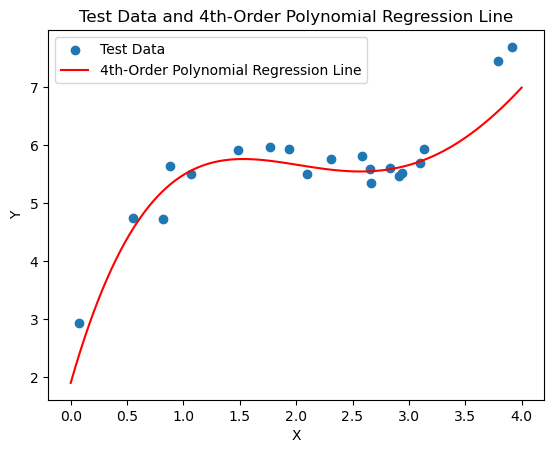

In [37]:
# Plot 4th-order polynomial regression line and test data together
plt.scatter(testX, testY)

# Plot the 4th-order polynomial regression line
x = np.linspace(0, 4, 100)
y = w4[4]*x**4 + w4[3]*x**3 + w4[2]*x**2 + w4[1]*x + w4[0]
plt.plot(x, y, color='red')

plt.legend(['Test Data', '4th-Order Polynomial Regression Line'])
plt.title('Test Data and 4th-Order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

# Report average error on test data
err = averageError(testXLR4, testY, w4)
print("Average Error on Test Data (4th-Order Polynomial Regression): ", err)

### What's Best?

Linear Regression:
- 0.509 training error
- 0.444 test error

2nd-Order:
- 0.201 training error
- 0.853 test error

3rd-Order:
- 0.039 training error
- 0.056 test error

4th-Order:
- 0.036 training error
- 0.127 test error

From the data we have, both the third-order and fourth-order solutions are similar and ideal for fitting the data. Overall, the 3rd-order solution would be best as it has the lowest error on the test data, and seems to be better than the 4th-order, since it is likely overfitting the training data to a decent degree, causing it to have a worse test error than 3rd-order.

## Question 3 - Regularization and Cross-Validation

### Part A:

### Part B:

### Part C: